In [ ]:
from __future__ import annotations
"""
NOTE: an LLM-generated list of topics

What do we want to find? To begin with, that asking for longer vs. shorter DOES actually modulate the length. Specfically,
we will be measuring:
1. The mean length at different temperatures (incl. greedy sampling) plus std and standard error, etc...
2. The NLLs between swapping long responses for short-response prompts and vice versa
3. The DPO reward using some kind of 
"""
topics: list[str] = [
    "uranium",
    "the impact of artificial intelligence on society",
    "how photosynthesis works",
    "the history of space exploration",
    "quantum computing fundamentals",
    "environmental sustainability practices",
    "the evolution of human language",
    "modern architectural design principles",
    "the role of bacteria in human health",
    "cryptocurrency and blockchain technology",
    "classical music composition techniques",
    "the psychology of decision making",
    "renewable energy sources",
    "ancient Egyptian civilization",
    "machine learning algorithms",
    "the process of film production",
    "global economic systems",
    "human brain structure and function",
    "climate change impacts",
    "the philosophy of consciousness",
    "digital privacy and cybersecurity",
    "the theory of evolution",
    "modern art movements",
    "the basics of computer programming",
    "world war two major events",
    "the pros and cons of yoga",
    "principles of genetic engineering",
    "meditation and mindfulness practices",
    "the solar system's structure",
    "democratic political systems",
    "artificial neural networks",
    "industrial revolution effects",
    "principles of organic chemistry",
    "social media influence",
    "human digestive system",
    "renaissance art history",
    "quantum physics principles",
    "virtual reality technology",
    "sustainable agriculture methods",
    "cognitive behavioral therapy",
    "ocean ecosystem dynamics",
    "automotive engineering basics",
    "medieval European history",
    "computer networking fundamentals",
    "jazz music development",
    "psychological disorders",
    "alternative energy technologies",
    "ancient Greek philosophy",
    "digital marketing strategies",
    "human immune system",
    "modern poetry analysis",
    "robotics engineering",
    "international relations theory",
    "deep learning applications",
    "documentary filmmaking",
    "stock market mechanics",
    "human genetics basics",
    "renewable resource management",
    "existential philosophy",
    "network security principles",
    "evolutionary biology",
    "contemporary dance forms",
    "software development lifecycle",
    "cold war history",
    "biotechnology applications",
    "yoga and meditation benefits",
    "planetary science basics",
    "parliamentary systems",
    "machine vision technology",
    "industrial automation",
    "biochemistry fundamentals",
    "social network analysis",
    "respiratory system function",
    "impressionist painting",
    "string theory physics",
    "augmented reality applications",
    "permaculture principles",
    "psychoanalytic theory",
    "marine biology basics",
    "electric vehicle technology",
    "renaissance period history",
    "database management systems",
    "blues music evolution",
    "anxiety disorders",
    "nuclear energy basics",
    "stoic philosophy",
    "content marketing strategies",
    "cardiovascular system",
    "modern literature analysis",
    "aerospace engineering",
    "game theory applications",
    "3D printing technology",
    "investigative journalism",
    "cryptocurrency trading",
    "molecular biology basics",
    "waste management systems",
    "metaphysical philosophy",
    "cloud computing security",
    "natural selection process",
    "abstract expressionism",
    "agile development methods",
    "civil rights movement",
    "genetic modification ethics",
    "mindfulness meditation",
    "astrophysics principles",
    "electoral systems",
    "natural language processing",
    "manufacturing automation",
    "organic chemistry reactions",
    "behavioral economics",
    "skeletal system anatomy",
    "surrealist art movement",
    "quantum mechanics basics",
    "mixed reality technology",
    "regenerative agriculture",
    "developmental psychology",
    "coral reef ecosystems",
    "hybrid vehicle systems",
    "victorian era society",
    "artificial intelligence ethics",
    "rock music history",
    "personality disorders",
    "solar power technology",
    "eastern philosophy",
    "search engine optimization",
    "endocrine system function",
    "postmodern literature",
    "mechanical engineering basics",
    "microeconomic theory",
    "blockchain applications",
    "documentary photography",
    "options trading basics",
    "cell biology fundamentals",
    "circular economy principles",
    "political philosophy",
    "information security",
    "genetic drift concept",
    "pop art movement",
    "devops practices",
    "american revolution",
    "stem cell research",
    "transcendental meditation",
    "cosmology basics",
    "voting systems",
    "computer vision applications",
    "energy efficiency methods",
    "analytical chemistry",
    "market psychology",
    "nervous system function",
    "dadaist art movement",
    "relativistic physics",
    "edge computing technology",
    "urban farming practices",
    "social psychology",
    "wetland ecosystems",
    "america",
    "autonomous vehicles",
    "enlightenment period",
    "machine ethics",
    "classical ballet history",
    "eating disorders",
    "wind energy systems",
    "western philosophy",
    "email marketing strategies",
    "lymphatic system function",
    "magical realism literature",
    "civil engineering basics",
    "macroeconomic theory",
    "distributed ledger technology",
    "street photography",
    "futures trading basics",
    "genetics and heredity",
    "sustainable development goals",
    "moral philosophy",
    "cybersecurity frameworks",
    "speciation process",
    "minimalist art movement",
    "site reliability engineering",
    "french revolution",
    "cloning technology",
    "guided meditation",
    "dark matter theory",
    "proportional representation",
    "reinforcement learning",
    "smart grid technology",
    "physical chemistry",
    "consumer behavior",
    "muscular system anatomy",
    "bauhaus movement",
    "quantum field theory",
    "fog computing basics",
    "vertical farming methods",
    "educational psychology",
    "desert ecosystems",
    "space travel technology",
    "renaissance philosophy",
    "artificial consciousness",
    "modern dance history",
    "bipolar disorder",
    "geothermal energy",
    "existentialism basics",
    "influencer marketing",
    "reproductive system",
    "stream of consciousness literature",
    "environmental engineering",
    "behavioral finance",
    "quantum computing applications",
    "wildlife photography",
    "chinese history",
    "commodity trading basics",
    "evolutionary psychology",
    "zero waste lifestyle",
    "ethics philosophy",
    "penetration testing methods",
    "adaptive radiation concept",
    "conceptual art movement",
    "platform engineering practices",
    "industrial revolution",
    "genetic engineering ethics",
    "mindfulness-based stress reduction",
    "string theory basics",
    "ranked choice voting",
    "deep reinforcement learning",
    "renewable energy storage",
    "environmental chemistry",
    "trading psychology",
    "immune system function",
    "gothic architecture",
    "quantum entanglement",
    "how search engines work",
    "edge computing applications",
    "aquaponic farming",
    "cognitive psychology",
    "rainforest ecosystems",
    "rocket propulsion technology",
    "humanist philosophy",
    "artificial general intelligence",
    "contemporary theater",
    "schizophrenia treatment",
    "hydrogen fuel cells",
    "pragmatist philosophy",
    "viral marketing strategies",
    "human anatomy basics",
    "postcolonial literature",
    "structural engineering",
    "international economics",
    "quantum cryptography",
    "nature photography",
    "forex trading basics",
    "sociobiology theory",
    "sustainable living practices"
]
# template = "write me a {length} paragraph about {topic}"
template = "write me {num_sentences} sentence(s) about {topic}"
num_sentences_to_consider = [1, 2, 3, 4, 5]
# user_prompts_long = [
#     template.format(length="long", topic=topic)
#     for topic in topics
# ]
# user_prompts_short = [
#     template.format(length="short", topic=topic)
#     for topic in topics
# ]
user_prompts = []
for num_sentences in num_sentences_to_consider:
    user_prompts.extend([
        template.format(num_sentences=num_sentences, topic=topic)
        for topic in topics
    ])
print(f"Created {len(user_prompts)} user prompts (in total: half are long and half are short)")
print(user_prompts[0])

import transformers
import dotenv
import os

dotenv.load_dotenv()
assert "CUDA_VISIBLE_DEVICES" in os.environ, "CUDA_VISIBLE_DEVICES is not set"
device = 'cuda'
model_name = "meta-llama/Llama-3.2-1B-Instruct"
model = transformers.LlamaForCausalLM.from_pretrained(model_name)
tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_name
)
print("loaded model and tokenizer")
# Run this through the CHAT templte and tokenizer
conversations = [[{"role": "user", "content": user_prompt}] for user_prompt in user_prompts]
tokenizer.pad_token_id = tokenizer.eos_token_id  # LOL
tokenized_inputs = tokenizer.apply_chat_template(
    conversations,
    tokenize=True,
    return_tensors="pt",
    pad_token_id=tokenizer.pad_token_id,
    padding="longest",
    padding_side="left",
)
chat_templated_only_inputs = tokenizer.apply_chat_template(
    conversations,
    tokenize=False,
    # return_tensors="pt",
    pad_token_id=tokenizer.pad_token_id,
    padding="longest",
    padding_side="left",
)
print("finished tokenizing inputs!")

Created 1255 user prompts (in total: half are long and half are short)
write me 1 sentence(s) about uranium
loaded model and tokenizer
finished tokenizing inputs!


In [2]:
chat_templated_only_inputs[0]

'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 18 Feb 2025\n\n<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nwrite me 1 sentence(s) about uranium<|eot_id|>'

In [3]:
tokenized_inputs

tensor([[128000, 128006,   9125,  ..., 128009, 128009, 128009],
        [128000, 128006,   9125,  ...,    389,   8396, 128009],
        [128000, 128006,   9125,  ..., 128009, 128009, 128009],
        ...,
        [128000, 128006,   9125,  ..., 128009, 128009, 128009],
        [128000, 128006,   9125,  ..., 128009, 128009, 128009],
        [128000, 128006,   9125,  ..., 128009, 128009, 128009]])

In [4]:
import torch
@torch.no_grad()
class temporary_eval:
    """Thanks to Claude, we can use this below to write less lines for both eval and no-grad."""

    def __init__(self, model):
        self.model = model
        self.training = model.training  # Store original training state

    def __enter__(self):
        self.model.eval()
        return self.model

    def __exit__(self, *args):
        self.model.train(self.training)  # Restore original state

/tmp/ipykernel_965353/3308601868.py:2: FutureWarning: Decorating classes is deprecated and will be disabled in future versions. You should only decorate functions or methods. To preserve the current behavior of class decoration, you can directly decorate the `__init__` method and nothing else.
  @torch.no_grad()


In [5]:
device = 'cuda'
model=model.to(device)
tokenized_inputs = tokenized_inputs.to(device)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [6]:
# import random
import tqdm
sample_num_responses = 5
require_gpu = True
generated_responses = []
batch_size = 10
with temporary_eval(model):
    assert isinstance(tokenized_inputs, torch.Tensor)
    assert tokenized_inputs.ndim == 2
    assert tokenized_inputs.shape[0] == len(conversations)
    for idx in tqdm.trange(0, len(conversations), batch_size):
        outputs = model.generate(
            tokenized_inputs[idx:min(idx+batch_size, len(tokenized_inputs)), :],
            # max_length=512,  # Adjust max length as needed, you can see above that the max length is <= 512
            max_new_tokens=512,  # Allow for a LOT of new tokens for some variation
            num_return_sequences=1,
            do_sample=False,  # Greedy decoding
            pad_token_id=tokenizer.pad_token_id,
        )
        batch_generated_responses = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        assert isinstance(generated_responses, list), type(generated_responses)
        # assert len(generated_responses) == len(conversations)
        # assert len(generated_responses) >= sample_num_responses
        assert all(isinstance(x, str) for x in generated_responses)
        generated_responses.extend(batch_generated_responses)

    # responses_to_print = random.sample(
    #     list(enumerate(generated_responses)),
    #     min(sample_num_responses, len(generated_responses)),
    # )
    assert len(generated_responses) >= sample_num_responses
    responses_to_print = list(enumerate(generated_responses[:sample_num_responses]))
    # Print a few examples
    for i, response in responses_to_print:
        print(f"\nPrompt {i+1}:")
        # print(f"Input: {prompts_dataset[prompt_key][i][:100]}...")
        print(f"Generated: {response}...")
        print("=" * 100)

  0%|          | 0/126 [00:00<?, ?it/s]/mnt/align3_drive/adrianoh/miniconda3/envs/ifyoudont/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/mnt/align3_drive/adrianoh/miniconda3/envs/ifyoudont/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
A decoder-only architecture is being used, b


Prompt 1:
Generated: system

Cutting Knowledge Date: December 2023
Today Date: 18 Feb 2025

user

write me 1 sentence(s) about uranium

Uranium is a naturally occurring radioactive metal with a half-life of approximately 4.5 billion years, making it one of the oldest and most enduring elements on Earth....

Prompt 2:
Generated: system

Cutting Knowledge Date: December 2023
Today Date: 18 Feb 2025

user

write me 1 sentence(s) about the impact of artificial intelligence on societyassistant

The increasing use of artificial intelligence is expected to significantly impact society, with potential benefits such as improved healthcare and education, but also risks of job displacement, bias, and increased vulnerability to cyber threats....

Prompt 3:
Generated: system

Cutting Knowledge Date: December 2023
Today Date: 18 Feb 2025

user

write me 1 sentence(s) about how photosynthesis worksassistant

Photosynthesis is the process by which plants, algae, and some bacteria convert light energy

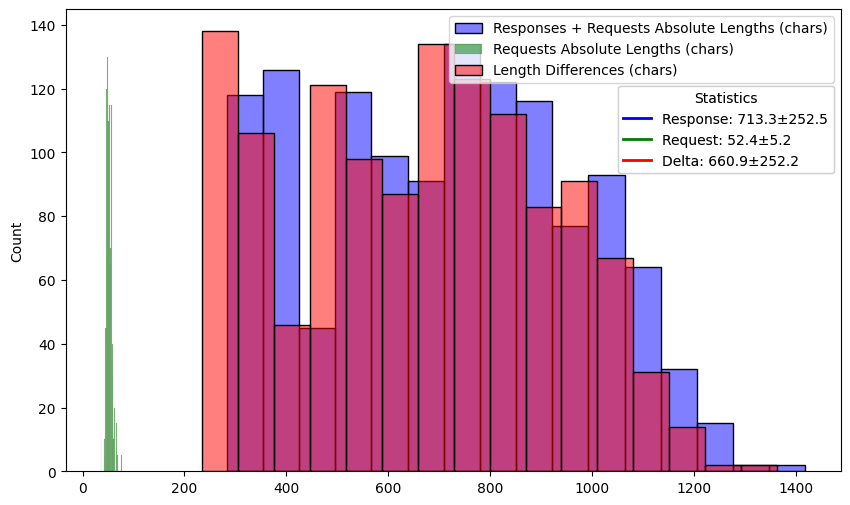

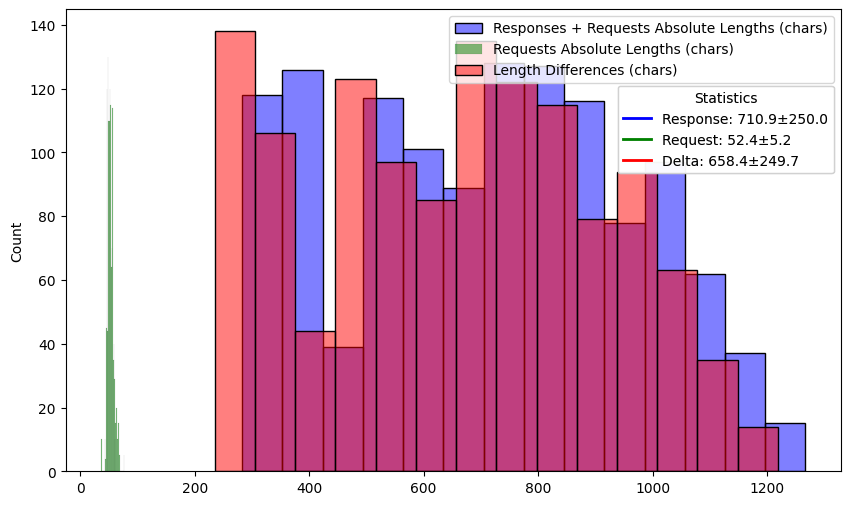

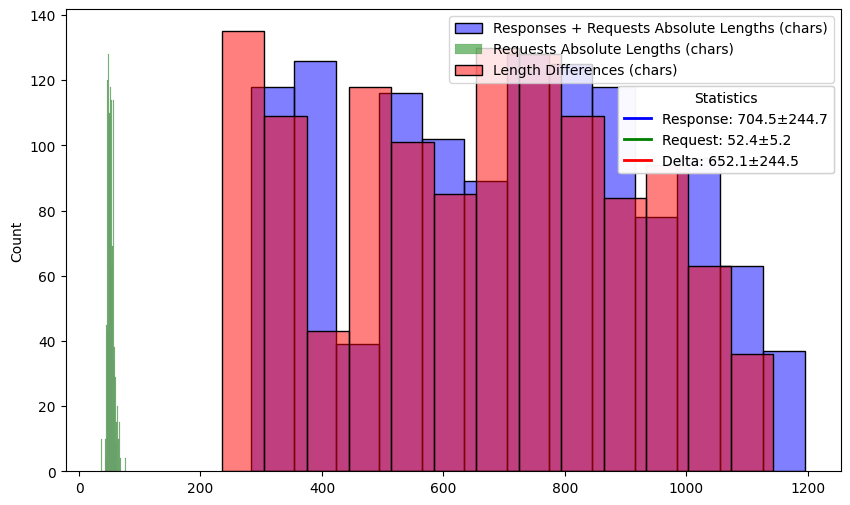

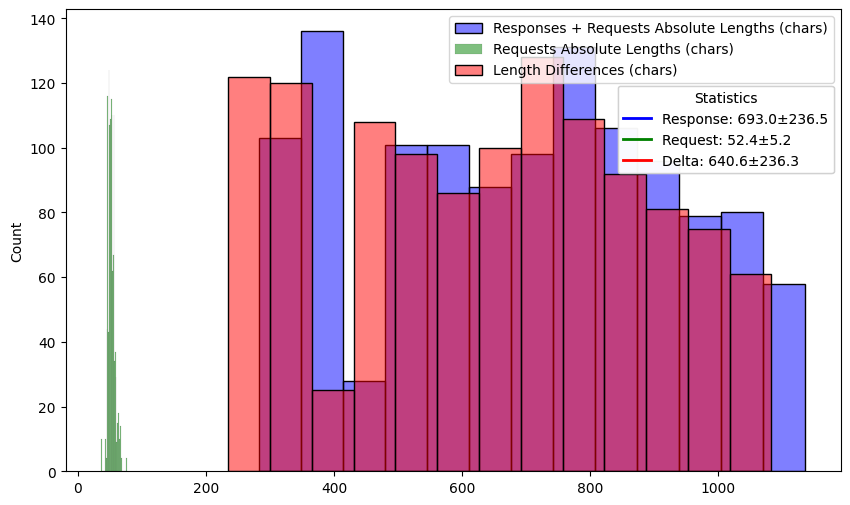

In [9]:
# NOTE: they look KINDA gaussian so we are going to just summmarize with mean and std
import numpy as np
from typing import List
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt

assert len(generated_responses) == len(user_prompts)
discard_top_ks = [0, 5, 20, 50]  # Discard outliers
__non_discard_indices = sorted(
    list(range(len(generated_responses))),
    key=lambda x: len(generated_responses[x]),
)
non_discard_indices = [
    __non_discard_indices[: (-k if k > 0 else None)] for k in discard_top_ks
]
assert all(
    len(i) == len(generated_responses) - k
    for k, i in zip(discard_top_ks, non_discard_indices)
), f"{len(generated_responses)} - {discard_top_ks} = {[len(non_discard_indices[i]) for i in range(len(discard_top_ks))]}"


def plot_triple_length_histograms(
    generated_responses: List[str],
    prompts_dataset: List[dict],
    non_discard_indices: List[int],
):
    response_abs_lengths = np.array([len(x) for x in generated_responses])[
        non_discard_indices
    ]
    resp_abs_mean, resp_abs_std = (
        response_abs_lengths.mean(),
        response_abs_lengths.std(),
    )
    requests_abs_lengths = np.array([len(x) for x in prompts_dataset])[
        non_discard_indices
    ]
    req_abs_mean, req_abs_std = requests_abs_lengths.mean(), requests_abs_lengths.std()
    response_delta_lengths = response_abs_lengths - requests_abs_lengths
    resp_delta_mean, resp_delta_std = (
        response_delta_lengths.mean(),
        response_delta_lengths.std(),
    )
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=response_abs_lengths,
        color="blue",
        label="Responses + Requests Absolute Lengths (chars)",
        alpha=0.5,
    )
    sns.histplot(
        data=requests_abs_lengths,
        color="green",
        label="Requests Absolute Lengths (chars)",
        alpha=0.5,
    )
    sns.histplot(
        data=response_delta_lengths,
        color="red",
        label="Length Differences (chars)",
        alpha=0.5,
    )
    custom_lines = [
        Line2D([0], [0], color="blue", lw=2),
        Line2D([0], [0], color="green", lw=2),
        Line2D([0], [0], color="red", lw=2),
    ]
    custom_labels = [
        f"Response: {resp_abs_mean:.1f}±{resp_abs_std:.1f}",
        f"Request: {req_abs_mean:.1f}±{req_abs_std:.1f}",
        f"Delta: {resp_delta_mean:.1f}±{resp_delta_std:.1f}",
    ]
    legend1 = plt.legend(loc="upper right", bbox_to_anchor=(1, 1))
    legend2 = plt.legend(
        custom_lines,
        custom_labels,
        loc="upper right",
        bbox_to_anchor=(1, 0.85),
        title="Statistics",
    )
    plt.gca().add_artist(legend1)
    plt.gca().add_artist(legend2)
    plt.show()


for i in non_discard_indices:
    plot_triple_length_histograms(generated_responses, user_prompts, i)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Linear Regression Coefficient: 3.111
Linear Regression Intercept: 550.199
Mean Response Length: 713.3
Mean Length Delta: 660.9 ± 252.2


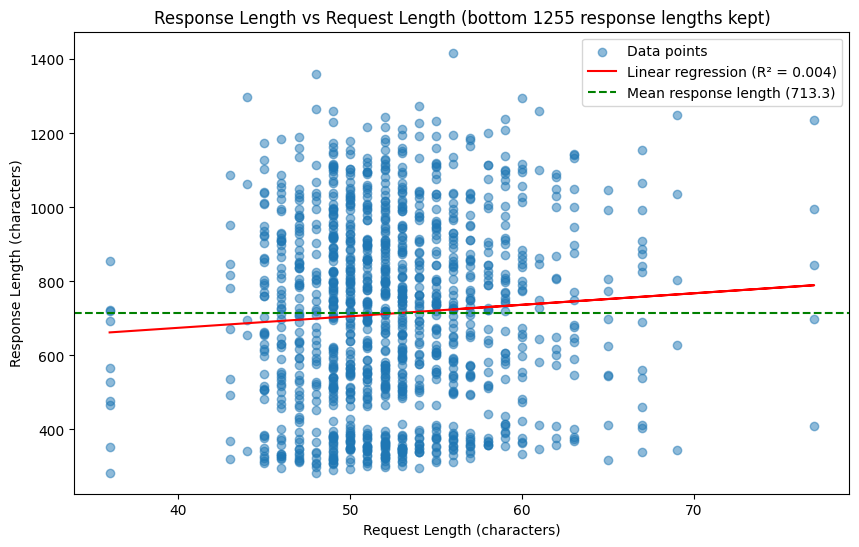

Linear Regression Coefficient: 3.127
Linear Regression Intercept: 546.893
Mean Response Length: 710.9
Mean Length Delta: 658.4 ± 249.7


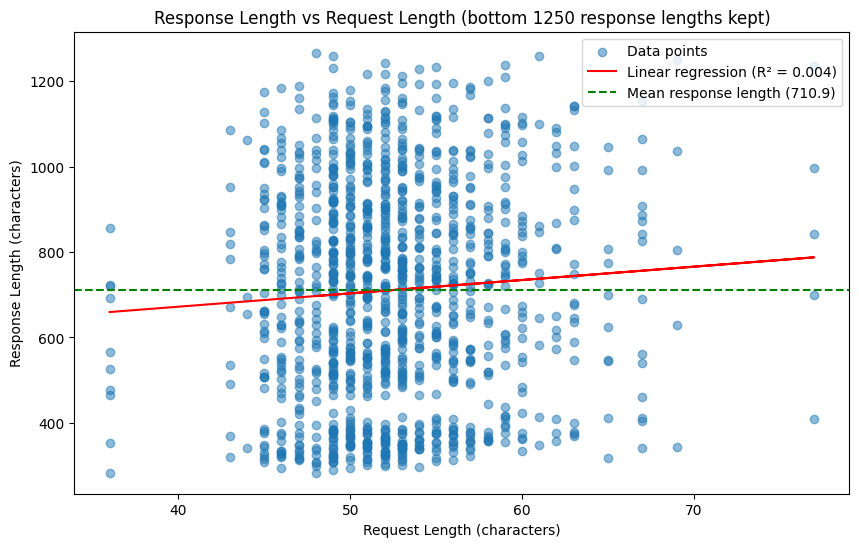

Linear Regression Coefficient: 2.287
Linear Regression Intercept: 584.693
Mean Response Length: 704.5
Mean Length Delta: 652.1 ± 244.5


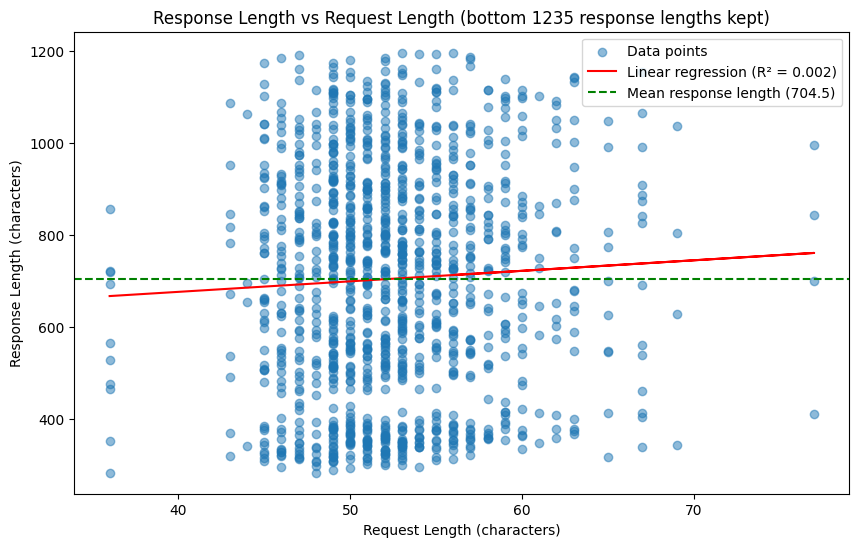

Linear Regression Coefficient: 2.109
Linear Regression Intercept: 582.542
Mean Response Length: 693.0
Mean Length Delta: 640.6 ± 236.3


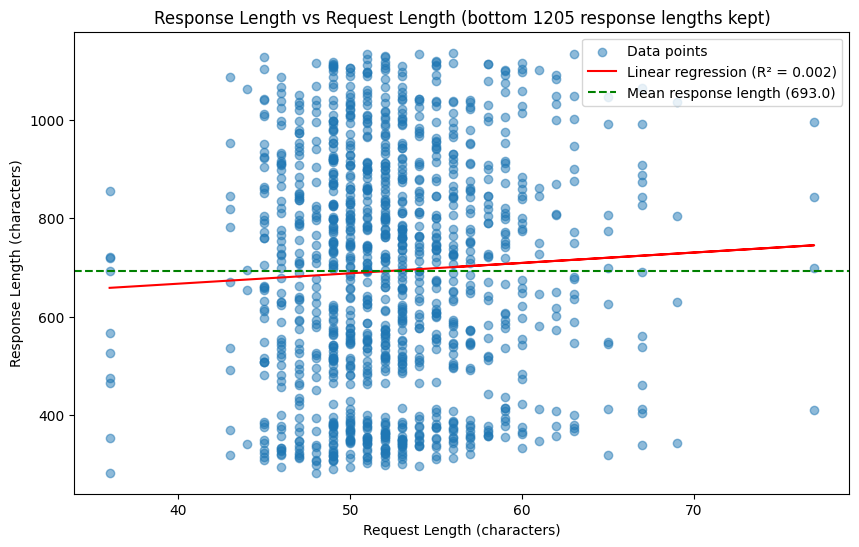

In [11]:
from sklearn.linear_model import LinearRegression


# NOTE: we are re-using the non_discard_indices from the previous plot_triple_length_histograms
def generate_linear_regression_plot(
    generated_responses: List[str],
    prompts_dataset: List[dict],
    non_discard_indices: List[int],
):
    # Get lengths
    request_lengths = np.array([len(x) for x in prompts_dataset])[
        non_discard_indices
    ]
    response_lengths = np.array([len(x) for x in generated_responses])[
        non_discard_indices
    ]
    delta_lengths = response_lengths - request_lengths

    # Prepare for regression
    X = np.array(request_lengths).reshape(-1, 1)
    y = np.array(response_lengths)

    # Fit linear regression
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)

    # Calculate mean response length for baseline
    mean_response_length = np.mean(response_lengths)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(request_lengths, response_lengths, alpha=0.5, label="Data points")

    # Plot regression line
    plt.plot(
        X, y_pred, color="red", label=f"Linear regression (R² = {reg.score(X,y):.3f})"
    )

    # Plot mean estimator line
    plt.axhline(
        y=mean_response_length,
        color="green",
        linestyle="--",
        label=f"Mean response length ({mean_response_length:.1f})",
    )

    plt.xlabel("Request Length (characters)")
    plt.ylabel("Response Length (characters)")
    plt.title(
        f"Response Length vs Request Length (bottom {len(non_discard_indices)} response lengths kept)"
    )
    plt.legend()

    # Print some statistics
    print(f"Linear Regression Coefficient: {reg.coef_[0]:.3f}")
    print(f"Linear Regression Intercept: {reg.intercept_:.3f}")
    print(f"Mean Response Length: {mean_response_length:.1f}")
    print(
        f"Mean Length Delta: {np.mean(delta_lengths):.1f} ± {np.std(delta_lengths):.1f}"
    )

    plt.show()


for i in non_discard_indices:
    generate_linear_regression_plot(generated_responses, user_prompts, i)

In [13]:
sent1_responses = [x for x in generated_responses if "1 sentence(s)" in x]
sent2_responses = [x for x in generated_responses if "2 sentence(s)" in x]
sent3_responses = [x for x in generated_responses if "3 sentence(s)" in x]
sent4_responses = [x for x in generated_responses if "4 sentence(s)" in x]
sent5_responses = [x for x in generated_responses if "5 sentence(s)" in x]
assert len(sent1_responses) == len(sent2_responses)
assert len(sent2_responses) == len(sent3_responses)
assert len(sent3_responses) == len(sent4_responses)
assert len(sent4_responses) == len(sent5_responses)
responses_blocks = [sent1_responses, sent2_responses, sent3_responses, sent4_responses, sent5_responses]
responses_blocks_lengths = np.array([[len(x) for x in block] for block in responses_blocks])
responses_blocks_lengths_mean = np.mean(responses_blocks_lengths, axis=1)
responses_blocks_lengths_std = np.std(responses_blocks_lengths, axis=1)
responses_blocks_lengths_se = responses_blocks_lengths_std / np.sqrt(responses_blocks_lengths.shape[1])


Mean: 360.9, Std: 55.7, SE: 3.5
Mean: 554.7, Std: 57.4, SE: 3.6
Mean: 731.6, Std: 72.6, SE: 4.6
Mean: 868.2, Std: 88.3, SE: 5.6
Mean: 1051.3, Std: 107.0, SE: 6.8


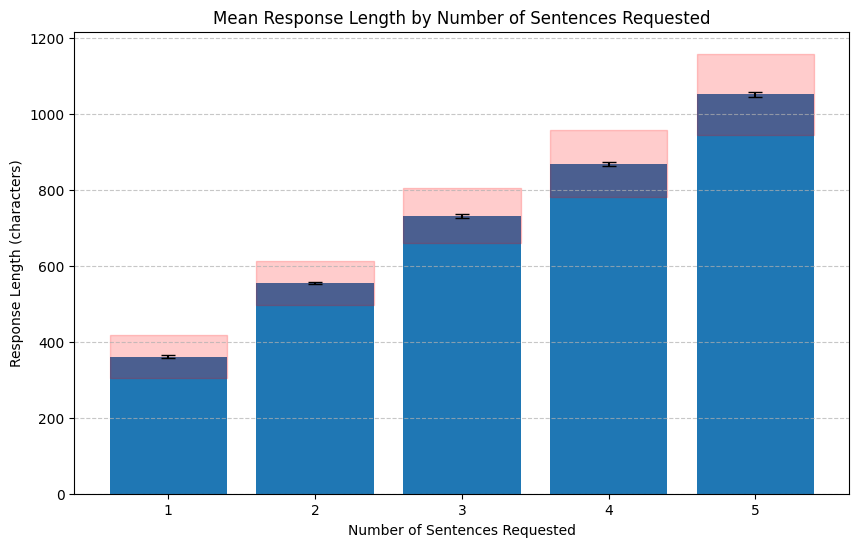

In [16]:
for mean, std, se in zip(responses_blocks_lengths_mean, responses_blocks_lengths_std, responses_blocks_lengths_se):
    print(f"Mean: {mean:.1f}, Std: {std:.1f}, SE: {se:.1f}")
# Create a bar plot of mean response lengths with error bars
plt.figure(figsize=(10, 6))
x = np.arange(1, 6)  # 1-5 sentences
plt.bar(x, responses_blocks_lengths_mean, yerr=responses_blocks_lengths_se, capsize=5)
# Add translucent boxes for standard deviation
for i, (mean, std) in enumerate(zip(responses_blocks_lengths_mean, responses_blocks_lengths_std), 1):
    plt.fill_between([i-0.4, i+0.4], [mean-std, mean-std], [mean+std, mean+std], alpha=0.2, color='red')
plt.xlabel("Number of Sentences Requested")
plt.ylabel("Response Length (characters)")
plt.title("Mean Response Length by Number of Sentences Requested")
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
"""
The conclusion from what you can see above is that the dataset is not great because the response lengths are not sufficiently variegated (imo) so we won't
necessarily be able to learn a ton about what actually is matching to length since everything contributes to the same length... With that said, I think we can
train probes, specifically, on activations that may be averaged over multiple tokens. These should in theory not contain the length information (though they might...)

If you cannot predict length from that even in this deterministic setting I think it means something is pretty not good. That's what we do next.
"""

#### Memory issues aaaaaargh
import gc
import time
from typing import Callable
import tqdm

try:
    del outputs
except NameError:
    pass
try:
    del activations
except NameError:
    pass
gc.collect()
torch.cuda.empty_cache()
time.sleep(1)  # It's not instant?!?!
####

input_lengths = np.array([len(x) for x in user_prompts])[
    non_discard_indices[-1]
]  # Get rid of a lot of outliers, 153 size dataset
# assert len(input_lengths) == 153 # ???
assert input_lengths.ndim == 1
output_lengths = np.array([len(x) for x in generated_responses])[
    non_discard_indices[-1]
]
assert len(output_lengths) == len(input_lengths)
assert output_lengths.ndim == 1


def fetch_activations(
    model: transformers.LlamaForCausalLM,  # Must return the proper type w/ hidden states
    tokenized_inputs: torch.Tensor,
    inference_batch_size: int = 20,
    tqdm: Callable = tqdm.tqdm,
) -> torch.Tensor:
    activations_stack: List[torch.Tensor] = []
    with temporary_eval(model):
        for batch_idx_start in tqdm(
            range(0, tokenized_inputs.shape[0], inference_batch_size),
            desc="Fetching activations",
            total=tokenized_inputs.shape[0] // inference_batch_size,
        ):
            batch_idx_end = min(
                batch_idx_start + inference_batch_size, tokenized_inputs.shape[0]
            )
            device = "cuda" if torch.cuda.is_available() else "cpu"
            assert not require_gpu or device == "cuda", "Device is not cuda"
            model = model.to(device)
            tokenized_inputs = tokenized_inputs.to(device)
            # Lol we use 1st token cuz yolo
            outputs: transformers.modeling_outputs.CausalLMOutputWithPast = model(
                tokenized_inputs[batch_idx_start:batch_idx_end, :],
                output_hidden_states=True,
            )
            assert isinstance(
                outputs, transformers.modeling_outputs.CausalLMOutputWithPast
            ), f"{type(outputs)}"
            assert isinstance(
                outputs.hidden_states, tuple
            ), f"{type(outputs.hidden_states)}"
            assert all(
                isinstance(x, torch.Tensor) for x in outputs.hidden_states
            ), f"Not all outputs are tensors: {[type(x) for x in outputs.hidden_states]}"
            assert len(outputs.hidden_states) > 0, f"{len(outputs.hidden_states)}"
            last_hidden_states = outputs.hidden_states[-1] # XXX not sure if this is wrong?
            assert last_hidden_states is not None
            assert last_hidden_states.ndim == 3, f"{last_hidden_states.ndim} != 3"
            assert (
                last_hidden_states.shape[0] == batch_idx_end - batch_idx_start
            ), f"{last_hidden_states.shape[0]} != {batch_idx_end - batch_idx_start}"  # batch size
            assert (
                last_hidden_states.shape[1] == tokenized_inputs.shape[1]
            ), f"{last_hidden_states.shape[1]} != {tokenized_inputs.shape[1]}"  # num tokens
            assert (
                last_hidden_states.shape[2] == model.config.hidden_size
            ), f"{last_hidden_states.shape[2]} != {model.config.hidden_size}"  # hidden size
            activations = last_hidden_states[
                :, -1, :
            ]  # Get last layer hidden states for last token, all dims
            assert activations.ndim == 2, f"{activations.ndim} != 2"
            assert (
                activations.shape[0] == batch_idx_end - batch_idx_start
            ), f"{activations.shape[0]} != {batch_idx_end - batch_idx_start}"
            assert (
                activations.shape[1] == model.config.hidden_size
            ), f"{activations.shape[1]} != {model.config.hidden_size}"
            # Turns out this can OOM :/
            activations_stack.append(activations.detach().cpu())
            del outputs, last_hidden_states, activations
            gc.collect()
            torch.cuda.empty_cache()
            time.sleep(1)

            # print("Activations shape:", activations.shape) # DEBUG - batch x token x hidden_size
    activations_stack_pt = torch.cat(activations_stack, dim=0)
    assert activations_stack_pt.ndim == 2
    assert activations_stack_pt.shape[0] == tokenized_inputs.shape[0]
    assert activations_stack_pt.shape[1] == model.config.hidden_size
    return activations_stack_pt


activations = fetch_activations(model, tokenized_inputs, inference_batch_size=20)
output_lengths = torch.Tensor(
    [len(x) for x in generated_responses]
)  # Note that this is in CHAR space (not token space) but that should be fine tbh
print("Activations shape:", activations.shape)
print("Output lengths shape:", output_lengths.shape)

Fetching activations: 63it [01:25,  1.36s/it]                        

Activations shape: torch.Size([1255, 2048])
Output lengths shape: torch.Size([1255])


R^2 score: 1.000
Intercept: 2600.874
Number of non-zero coefficients: 2048


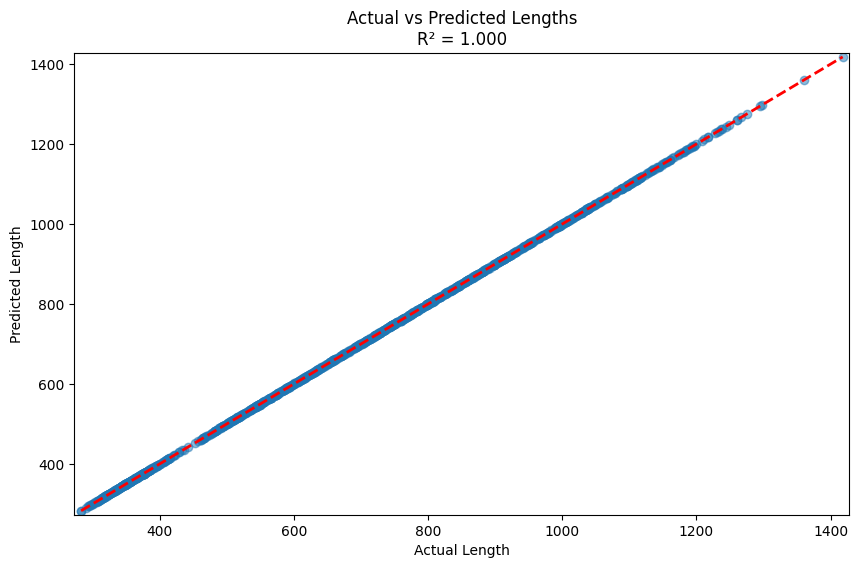

In [21]:
# print(output_lengths.shape) # DEBUG
# print(activations.shape) # DEBUG
# # TODO(Adrianoh): is it bad to have more features than data?
X = activations.numpy()
y = output_lengths.numpy()
assert X.shape[0] == activations.shape[0]
from sklearn.linear_model import LinearRegression

# Fit linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Get R^2 score
r2_score = reg.score(X, y)
print(f"R^2 score: {r2_score:.3f}")

# Print coefficients
print(f"Intercept: {reg.intercept_:.3f}")
print(f"Number of non-zero coefficients: {np.count_nonzero(reg.coef_)}")

# Create predictions for plotting
y_pred = reg.predict(X)

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # Perfect prediction line

plt.xlabel("Actual Length")
plt.ylabel("Predicted Length")
plt.title("Actual vs Predicted Lengths\n" + f"R² = {r2_score:.3f}")

# Add some padding to the axes
plt.xlim(y.min() - 10, y.max() + 10)
plt.ylim(y_pred.min() - 10, y_pred.max() + 10)

plt.show()